In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, accuracy_score

## 1. Загрузка данных (модель на плохих данных)

In [131]:
titanic_df = pd.read_csv('./Data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1 Фильтрация данных

In [132]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.2 удаление всех пропусков

In [133]:
titanic_df = titanic_df.dropna()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


### 1.3 Удаление категориальных переменных

In [134]:
category_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
titanic_df = titanic_df.drop(category_columns, axis=1)

### 1.4 Разделение данных на test / train

In [135]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 1.5 Обучение модели Логистической регрессии

In [137]:
log_reg_model = LogisticRegression(max_iter=1000)

In [138]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 1.6 Оценка модели

In [139]:
y_true = y_test
y_predict_proba = log_reg_model.predict_proba(X_test)

In [140]:
fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba[:, 1])

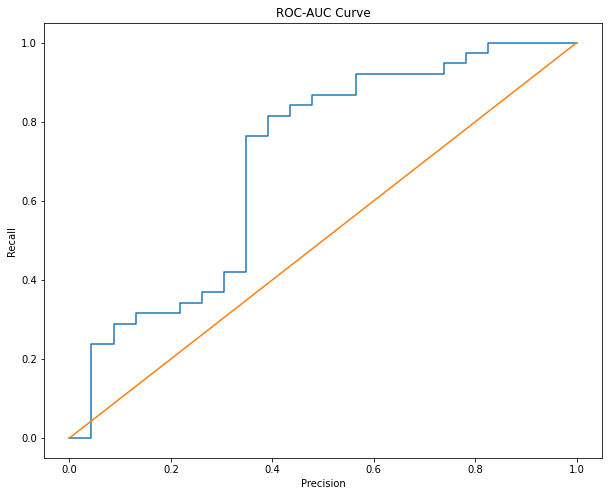

In [141]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0])
plt.title('ROC-AUC Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

 > Вывод по данной модели: по данному графику мы видим, то что модель плоховато справляется с классификацией

Вычислим метрику accuracy

In [143]:
accuracy_score(y_true, log_reg_model.predict(X_test))

0.6721311475409836

> Довольно плохая точность предсказаний 67%, модель близка к гадалке)

## 2.Загрузка данных (качественная обработка)

In [144]:
titanic_df = pd.read_csv('./Data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Удаление не нужных признаков для построения модели.

In [145]:
unnecessary_features = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [146]:
titanic_df = titanic_df.drop(unnecessary_features, axis=1)

Я убрал эти признаки потому, что:
1. PassengerId - это просто id пассажира.
2. Name - имя не как не характеризует объект, кроме его названия.
3. Ticket - это номер билета, логика аналогичная как у PassengerId.
4. Cabin - удалил этот признак потому, что в нем очень много пропущенных значений.
5. Embarked - нет никакой разницы откуда отправился пассажир, если в итоге все на одном корабле.

## 4. Работа с пропусками

### 4.1 Процент данных, который будет утерян при удаление

In [147]:
np.round((1 - len(titanic_df.dropna()) / len(titanic_df)) * 100, 0)

20.0

### 4.2 Заполнение пропусков

In [148]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [149]:
titanic_df['Age'] = titanic_df['Age'].fillna(np.mean(titanic_df['Age']))

> Заполнил средним значением, потому что Age - это числовой признак

## 5. Кодирование категориальных переменных

In [150]:
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit(titanic_df['Sex']).transform(titanic_df['Sex']) 

> Признак бинарный => отлично подходит LabelEncoder кодирующий значение в {0, 1}

## 6. Работа с выбросами

In [151]:
titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### 6.1 Поиск выбросов (признак Age)

Найдем 1 и 3 квартили, далее найдем межквартильный размах, затем вычислим границы выбросов.

In [152]:
q1, q3 = np.quantile(titanic_df['Age'], [0.25, 0.75])

IQR = q3 - q1
lower_half = q3 + 1.5 * IQR
upper_half = q1 - 1.5 * IQR

titanic_df[
    ~(titanic_df['Age'] <= lower_half) & (titanic_df['Age'] >= upper_half)
].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
11,1,1,0,58.0,0,0,26.5500
15,1,2,0,55.0,0,0,16.0000
33,0,2,1,66.0,0,0,10.5000
54,0,1,1,65.0,0,1,61.9792
94,0,3,1,59.0,0,0,7.2500
96,0,1,1,71.0,0,0,34.6542
116,0,3,1,70.5,0,0,7.7500
152,0,3,1,55.5,0,0,8.0500
170,0,1,1,61.0,0,0,33.5000
174,0,1,1,56.0,0,0,30.6958


Удалять не буду, потому что мы так исключаем пожилых людей из нашей выборки

### 6.1 Поиск выбросов (признак SibSp)

In [153]:
q1, q3 = np.quantile(titanic_df['SibSp'], [0.25, 0.75])

IQR = q3 - q1
lower_half = q3 + 1.5 * IQR
upper_half = q1 - 1.5 * IQR

titanic_df[
    ~(titanic_df['SibSp'] <= lower_half) & (titanic_df['SibSp'] >= upper_half)
].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
7,0,3,1,2.0,3,1,21.0750
16,0,3,1,2.0,4,1,29.1250
24,0,3,0,8.0,3,1,21.0750
27,0,1,1,19.0,3,2,263.0000
50,0,3,1,7.0,4,1,39.6875
59,0,3,1,11.0,5,2,46.9000
63,0,3,1,4.0,3,2,27.9000
68,1,3,0,17.0,4,2,7.9250
71,0,3,0,16.0,5,2,46.9000
85,1,3,0,33.0,3,0,15.8500


> Удалять не буду, потому что выбросы не значительные(есть значительные, но их несколько - это не повлияет на качество модели)

### 6.2 Поиск выбросов (признак Fare)

In [154]:
titanic_df = titanic_df[~(titanic_df['Fare'] >= 150)]

> Пороговое значение выброса взял сам, расчитав выбросы по шаблонной формуле мы получаем билеты с ценой 60-100, это еще нормально, но есть билеты у которых завышенная цена, а класс посадки такой же как у билета за 60-100.

## 7. Немного визуализаций

Text(0.5, 1.0, 'Матрица корреляции')

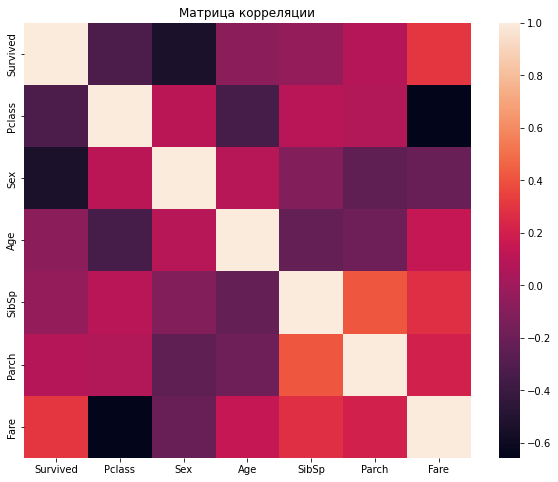

In [155]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr())
plt.title('Матрица корреляции')

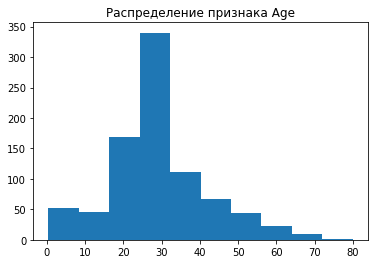

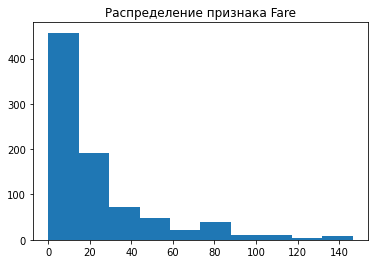

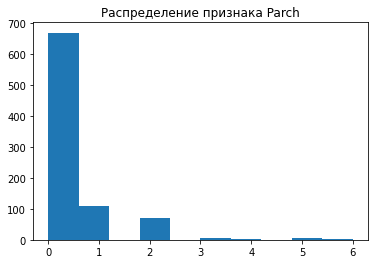

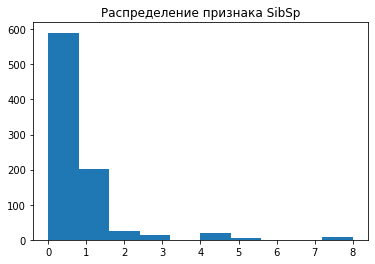

In [156]:
for column in ['Age', 'Fare', 'Parch', 'SibSp']:
    plt.hist(titanic_df[column])
    plt.title(f'Распределение признака {column}')
    plt.show()

## 8. Разделение данных на train и test

In [157]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 9. Обучение модели

In [159]:
log_reg_model = LogisticRegression(max_iter=1000)

In [160]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [161]:
y_true = y_test
y_predict_proba = log_reg_model.predict_proba(X_test)

In [162]:
fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba[:, 1])

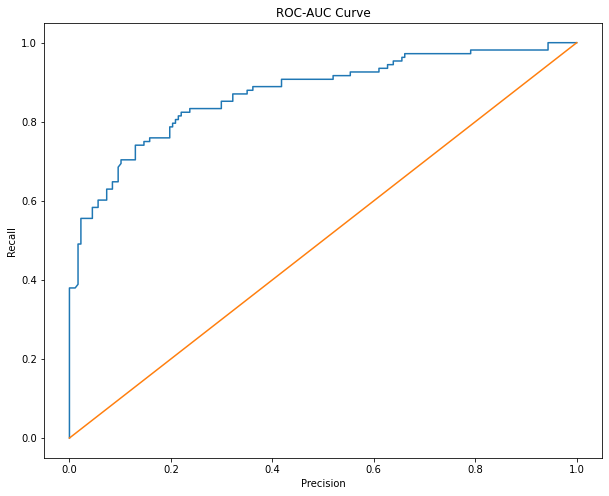

In [163]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0])
plt.title('ROC-AUC Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

> Как мы видим модель довольно хорошо справилась с классификацией данных, кривая довольно хорошо отдалена от касательной.

Вычислим accuracy:

In [164]:
accuracy_score(y_true, log_reg_model.predict(X_test))

0.7929824561403509

> 79 процентов, это на 12 процентов выше, чем у нас было с плохими данными

## Выводы

Работа с данными при построение модели машинного обучения - это довольно важный этап, потому что если модели "скормить" некачественные данные, то это может привести к низким метрикам или вообще к неправильной ее работе.

P.s все выводы о преобразование данных я написал после каждой операции над ними